In [1]:
import pandas as pd

In [2]:
df1 = pd.read_excel("CAPEX L6.xlsx")
df1.tail()

,Sr.No.,Accord Code,Company Name,GB+CWIP_1Y_CAGR,GB+CWIP_2Y_CAGR,GB+CWIP_3y_CAGR,FH_Market Capitalization,CONS_FH_1
68,69,132539,UNO Minda Ltd.,62.111932,8.522771,16.717678,9369.626750,C
69,70,132867,V2 Retail Ltd.,31.018496,43.014605,50.404385,1416.103112,S
70,71,267541,Vishal Fabrics Ltd.,56.810990,66.870475,53.601744,2802.096000,S
71,72,122029,Windsor Machines Ltd.,2.370369,107.335818,66.369203,620.100600,C
72,73,221217,Wonderla Holidays Ltd.,12.642100,52.425129,50.620356,1925.826360,S


In [3]:
df1["GB+CWIP_CAPEX_SUM"] = df1["GB+CWIP_1Y_CAGR"] + df1["GB+CWIP_2Y_CAGR"] + df1["GB+CWIP_3y_CAGR"]

print("mean std for cagr")
mean_value = df1['GB+CWIP_CAPEX_SUM'].mean()
print(mean_value)
std_dev = df1['GB+CWIP_CAPEX_SUM'].std()
print(std_dev)

df1['ZSCORE_CAPEX'] = (df1['GB+CWIP_CAPEX_SUM']-mean_value) / std_dev

print("mean std for mcap")
mean_value = df1['FH_Market Capitalization'].mean()
print(mean_value)
std_dev = df1['FH_Market Capitalization'].std()
print(std_dev)

df1['ZSCORE_MCAP'] = (df1['FH_Market Capitalization']-mean_value) / std_dev

df1.tail()

mean std for cagr
287.62412481788425
786.6034726070208
mean std for mcap
4440.838838859316
4820.88270709408


,Sr.No.,Accord Code,Company Name,GB+CWIP_1Y_CAGR,GB+CWIP_2Y_CAGR,GB+CWIP_3y_CAGR,FH_Market Capitalization,CONS_FH_1,GB+CWIP_CAPEX_SUM,ZSCORE_CAPEX,ZSCORE_MCAP
68,69,132539,UNO Minda Ltd.,62.111932,8.522771,16.717678,9369.626750,C,87.352382,-0.254603,1.022383
69,70,132867,V2 Retail Ltd.,31.018496,43.014605,50.404385,1416.103112,S,124.437486,-0.207457,-0.627424
70,71,267541,Vishal Fabrics Ltd.,56.810990,66.870475,53.601744,2802.096000,S,177.283209,-0.140275,-0.339926
71,72,122029,Windsor Machines Ltd.,2.370369,107.335818,66.369203,620.100600,C,176.075389,-0.141811,-0.792539
72,73,221217,Wonderla Holidays Ltd.,12.642100,52.425129,50.620356,1925.826360,S,115.687585,-0.218581,-0.521691


In [4]:
df2 = pd.read_excel("TRENDLYNE_230425.xlsx")
df2.head()

,Stock Name,NSE Code,BSE Code,Stock Code,ISIN,Industry Name,Current Price,Current Price.1,Market Capitalization,PE TTM Price to Earnings,...,Sector Return on Equity ROE,Industry Return on Equity ROE,RoA Annual %,Sector Return on Assets,Industry Return on Assets,Piotroski Score,sector_name,Industry Name.1,Latest financial result,Result Announced Date
0,20 Microns Ltd.,20MICRONS,533022.0,20MICRONS,INE144J01027,Coal & Mining,227.25,227.25,801.89,13.19,...,23.96,38.63,9.50,10.88,17.60,7.0,Metals & Mining,Coal & Mining,2024-12-31,2025-01-22
1,360 ONE Gold ETF,GOLD360,544375.0,GOLD360,INF579M01BB5,Others,95.45,95.45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Others,Others,NaT,NaT
2,360 ONE Silver ETF,SILVER360,544389.0,SILVER360,INF579M01BC3,Others,99.20,99.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Others,Others,NaT,NaT
3,360 One Wam Ltd.,360ONE,542772.0,360ONE,INE466L01038,Capital Markets,1057.00,1057.00,41613.87,41.27,...,17.25,23.88,5.31,2.86,8.70,3.0,Banking and Finance,Capital Markets,2024-12-31,2025-04-23
4,3B BlackBio Dx Ltd.,NaN,532067.0,3BBLACKBIO,INE994E01018,Agrochemicals,1784.05,1784.05,1531.20,31.87,...,14.53,17.06,12.93,9.90,12.59,7.0,Chemicals & Petrochemicals,Agrochemicals,2024-12-31,2025-02-13


In [5]:
merged_df = pd.merge(df1, df2, how='inner', left_on='Company Name', right_on='Stock Name')
merged_df.head()

,Sr.No.,Accord Code,Company Name,GB+CWIP_1Y_CAGR,GB+CWIP_2Y_CAGR,GB+CWIP_3y_CAGR,FH_Market Capitalization,CONS_FH_1,GB+CWIP_CAPEX_SUM,ZSCORE_CAPEX,...,Sector Return on Equity ROE,Industry Return on Equity ROE,RoA Annual %,Sector Return on Assets,Industry Return on Assets,Piotroski Score,sector_name,Industry Name.1,Latest financial result,Result Announced Date
0,1,131082,Alankit Ltd.,48.632730,23.589488,230.452672,603.282760,C,302.674889,0.019134,...,11.62,17.21,4.05,5.38,11.83,5.0,Commercial Services & Supplies,Misc. Commercial Services,2024-12-31,2025-01-30
1,2,224849,Alembic Pharmaceuticals Ltd.,63.201376,34.733442,31.626089,10363.730000,C,129.560907,-0.200944,...,16.90,17.11,9.55,11.67,11.81,9.0,Pharmaceuticals & Biotechnology,Pharmaceuticals,2024-12-31,2025-05-06
2,3,106767,Alkyl Amines Chemicals Ltd.,50.557054,9.300883,9.854000,1234.696074,C,69.711936,-0.277029,...,14.53,14.40,9.40,9.90,9.72,6.0,Chemicals & Petrochemicals,Specialty Chemicals,2024-12-31,2025-05-09
3,4,285359,Apex Frozen Foods Ltd.,55.679779,45.172724,38.550088,1909.218750,S,139.402591,-0.188432,...,19.70,15.33,2.30,14.51,10.42,4.0,Food Beverages & Tobacco,Other Food & Beverages,2024-12-31,2025-02-01
4,5,131761,Apollo Pipes Ltd.,66.881188,37.633398,32.444753,597.181728,S,136.959339,-0.191538,...,21.36,16.41,5.15,11.85,12.30,5.0,General Industrials,Plastic Products,2024-12-31,2025-01-27


In [6]:
df3 = pd.read_excel("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/L6 Valuation Data.xlsx")

final_merged_df = pd.merge(merged_df, df3, how='inner', left_on='Company Name', right_on='Company Name')
final_merged_df.head()

mean_value = final_merged_df['FR_Adjusted PE (x)'].mean()
std_dev = final_merged_df['FR_Adjusted PE (x)'].std()
final_merged_df['ZSCORE_PE'] = (final_merged_df['FR_Adjusted PE (x)']-mean_value) / std_dev

mean_value = final_merged_df['FR_EV/EBITDA(x)'].mean()
std_dev = final_merged_df['FR_EV/EBITDA(x)'].std()
final_merged_df['ZSCORE_EVEBITDA'] = (final_merged_df['FR_EV/EBITDA(x)']-mean_value) / std_dev

final_merged_df['ZSCORE_FINAL'] = (0.6 * final_merged_df['ZSCORE_CAPEX']) + (0.2 * final_merged_df['ZSCORE_MCAP']) + (0.10 * final_merged_df['ZSCORE_PE']) + (0.10 * final_merged_df['ZSCORE_EVEBITDA'])
# final_merged_df['ZSCORE_FINAL'] = (1 * final_merged_df['ZSCORE_CAPEX'])



final_merged_df = final_merged_df[final_merged_df["ZSCORE_FINAL"]>0]

# final_merged_df['PORTFOLIO_WEIGHTS'] = final_merged_df["ZSCORE_FINAL"]/final_merged_df["ZSCORE_FINAL"].sum()

column_list = final_merged_df['Stock Code'].tolist()
# print(column_list)

final_merged_df.head(5)

final_merged_df.to_csv("rahul_s1l6.csv")

In [7]:
df = pd.read_csv("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/mega_dateclose_final.csv")
columns_to_keep = ['Date'] + [col for col in column_list if col in df.columns]
filtered_with_date_df = df[columns_to_keep]


filtered_with_date_df['Date'] = pd.to_datetime(filtered_with_date_df['Date'])
start_date = pd.to_datetime("2018-03-31")
end_date = pd.to_datetime("2021-04-02")
filtered_df = filtered_with_date_df[(filtered_with_date_df['Date'] >= start_date) & (filtered_with_date_df['Date'] <= end_date)]
filtered_df.head()


df_cleaned = filtered_df.dropna(how='all', subset=filtered_df.columns.difference(['Date']))
rows_removed = len(filtered_df) - len(df_cleaned)
# print("ROWS REMOVED i.e. ALL VALUES MISSING EXCEPT DATE:", rows_removed)
df_cleaned.head()


df_fully_cleaned = df_cleaned.dropna(axis=1)
final_columns = df_fully_cleaned.columns.tolist()
if 'Date' in final_columns:
    final_columns.remove('Date')
print(final_columns)
df_fully_cleaned.head()


df_fully_cleaned['Date'] = pd.to_datetime(df_fully_cleaned['Date'])
df_fully_cleaned.set_index('Date', inplace=True)
pct_change_df = df_fully_cleaned.pct_change() 
pct_change_df = pct_change_df.iloc[1:] 
pct_change_df.head()
# pct_change_df.to_csv("gptwork.csv",index=False)



pct_change_df = pct_change_df.reset_index()  # This moves 'Date' from index to a regular column
pct_change_df.head()
# pct_change_df.to_csv("data1.csv",index=False)





# pct_change_df.to_csv("deletenow.csv",index=False)
# nan_counts = pct_change_df.isna().sum()
# print(nan_counts)
# columns_without_nans = df.columns[df.isna().sum() == 0].tolist()
# print(columns_without_nans)

# pct_change_df.dropna

['APLLTD', 'BRNL', 'BHARATWIRE', 'CDSL', 'CHOLAHLDNG', 'DISHTV', 'ERIS', 'GODREJPROP', 'GSPL', 'IEX', 'INFIBEAM', 'NBCC', 'NAM-INDIA', 'PRESTIGE', 'QUESS', 'SCHAEFFLER', 'SIS', 'UNOMINDA']


C:\Users\meets\AppData\Local\Temp\ipykernel_40328\766037106.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_with_date_df['Date'] = pd.to_datetime(filtered_with_date_df['Date'])
C:\Users\meets\AppData\Local\Temp\ipykernel_40328\766037106.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fully_cleaned['Date'] = pd.to_datetime(df_fully_cleaned['Date'])


,Date,APLLTD,BRNL,BHARATWIRE,CDSL,CHOLAHLDNG,DISHTV,ERIS,GODREJPROP,GSPL,IEX,INFIBEAM,NBCC,NAM-INDIA,PRESTIGE,QUESS,SCHAEFFLER,SIS,UNOMINDA
0,2018-04-03,-0.006341,-0.008041,0.002578,0.018401,0.015723,-0.006190,0.003309,0.004741,-0.017814,-0.000944,0.042105,0.055765,0.006677,-0.000337,-0.012801,-0.010711,-0.004500,0.033866
1,2018-04-04,0.017018,-0.014861,-0.030433,-0.023653,-0.004380,-0.022145,-0.022713,-0.020449,0.000812,-0.029301,0.001263,-0.034261,-0.015217,-0.013300,0.008545,-0.008992,0.017107,-0.013889
2,2018-04-05,0.001364,0.000274,0.072060,0.037685,0.000683,0.013447,0.012353,0.012078,0.019746,0.030185,0.030265,0.022173,0.015848,0.029517,0.041921,0.003842,0.007582,0.004252
3,2018-04-06,-0.017710,-0.006032,-0.007835,-0.012322,-0.007124,0.006983,0.000314,0.006416,0.007692,0.009452,0.020808,0.000000,0.002925,0.021876,0.009267,-0.003551,-0.014011,-0.003969
4,2018-04-09,-0.007581,0.042483,-0.026185,-0.002955,0.005267,0.008322,-0.000880,-0.013846,0.004738,0.018727,0.000000,0.013015,0.005250,0.014921,-0.006558,-0.018974,-0.022456,-0.002657


In [8]:
# PORTFOLIO WT CALCULATION

final_df = final_merged_df[final_merged_df['Stock Code'].isin([name.upper() for name in final_columns])]
final_df.head()

final_df['PORTFOLIO_WEIGHTS'] = final_df["ZSCORE_FINAL"]/final_df["ZSCORE_FINAL"].sum()
final_df.head()

final_df = final_df[["Stock Code","PORTFOLIO_WEIGHTS"]]
final_df.head(20)
# final_df.to_csv("data2.csv",index=False)

C:\Users\meets\AppData\Local\Temp\ipykernel_40328\3447757058.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['PORTFOLIO_WEIGHTS'] = final_df["ZSCORE_FINAL"]/final_df["ZSCORE_FINAL"].sum()


,Stock Code,PORTFOLIO_WEIGHTS
1,APLLTD,0.005144
7,BRNL,0.417373
8,BHARATWIRE,0.040039
14,CDSL,0.029852
16,CHOLAHLDNG,0.053695
18,DISHTV,0.035481
19,ERIS,0.035286
23,GODREJPROP,0.036609
26,GSPL,0.002085
32,IEX,0.059327


In [9]:
#DIRECT COPYPASTE - NO EDIT


# Align columns: ensure weights match the columns in the return dataframe
returns_df = pct_change_df.copy()
weights_df = final_df.set_index("Stock Code")["PORTFOLIO_WEIGHTS"]

# Ensure only common stocks are used
common_stocks = returns_df.columns.intersection(weights_df.index)
returns_matrix = returns_df[common_stocks].copy()
weights_vector = weights_df.loc[common_stocks]

# Perform matrix multiplication (dot product) for each date
returns_df["Portfolio Return"] = returns_matrix.dot(weights_vector)

# Show a few results
final_portfolio = returns_df[["Date", "Portfolio Return"]]
final_portfolio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              744 non-null    datetime64[ns]
 1   Portfolio Return  744 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.8 KB


In [10]:
#DIRECT COPYPASTE - NO EDIT

df2 = pd.read_csv("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/BENCHMARK/BSE500_PCTRETURNS_09-25.csv")
df2['BDP_Date'] = pd.to_datetime(df2['BDP_Date'])

final_portfolio_benchmark = pd.merge(final_portfolio, df2, how='inner', left_on='Date', right_on='BDP_Date')
final_portfolio_benchmark = final_portfolio_benchmark.drop('BDP_Date', axis=1)
final_portfolio_benchmark.set_index('Date', inplace=True)
final_portfolio_benchmark = final_portfolio_benchmark.rename(columns={'Portfolio Return':'Strategy'})
final_portfolio_benchmark.head()
final_portfolio_benchmark.to_csv("s1l6b.csv")
# final_portfolio_benchmark.to_csv("final_portfolio_benchmarkQ.csv")

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2018-04-03   2018-04-03
End Period                 2021-04-01   2021-04-01
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          38.98%       -45.04%
CAGR﹪                     7.88%        -12.88%

Sharpe                     0.64         -0.52
Prob. Sharpe Ratio         85.62%       18.38%
Smart Sharpe               0.53         -0.44
Sortino                    0.85         -0.72
Smart Sortino              0.71         -0.6
Sortino/√2                 0.6          -0.51
Smart Sortino/√2           0.5          -0.42
Omega                      0.91         0.91

Max Drawdown               -38.39%      -69.86%
Longest DD Days            495          1085
Volatility (ann.)          20.84%       30.04%
R^2                        0.3          0.3
Information Ratio          -0.07        -0.07
Calmar     

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2018-04-13,2020-03-23,2021-04-01,1085,-69.862688,-67.186905
2,2018-04-04,2018-04-04,2018-04-04,1,-1.363266,NaN


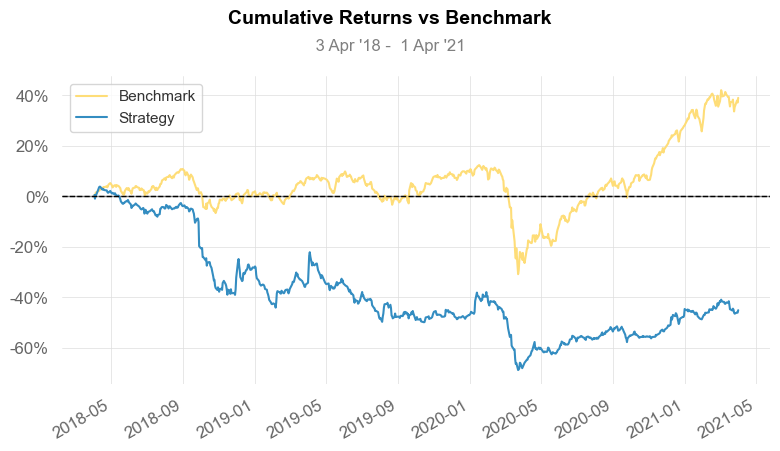

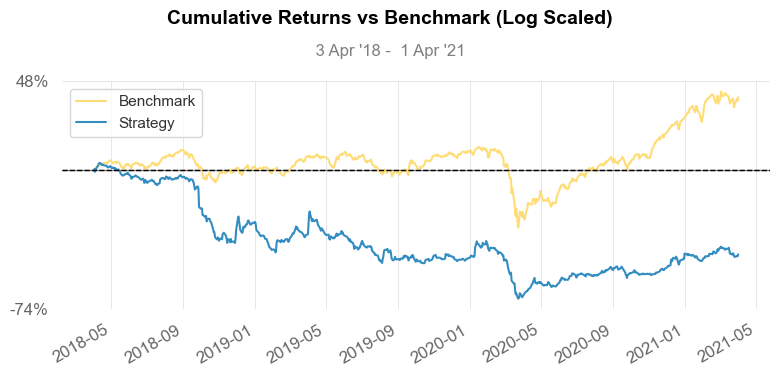

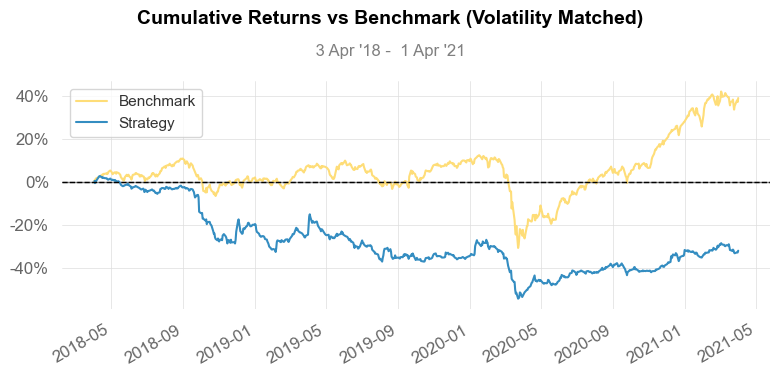

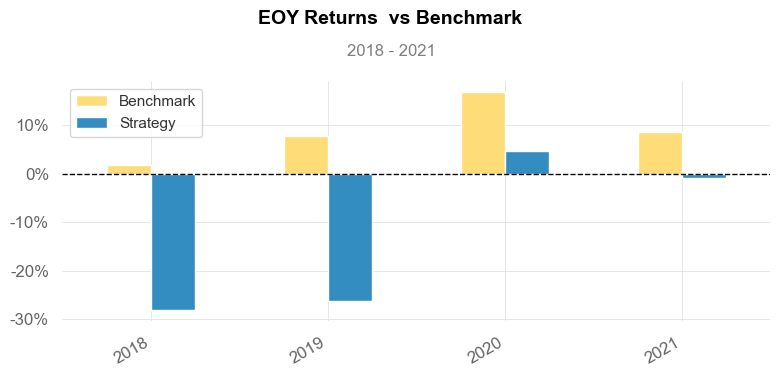

OptionError: No such keys(s): 'mode.use_inf_as_null'

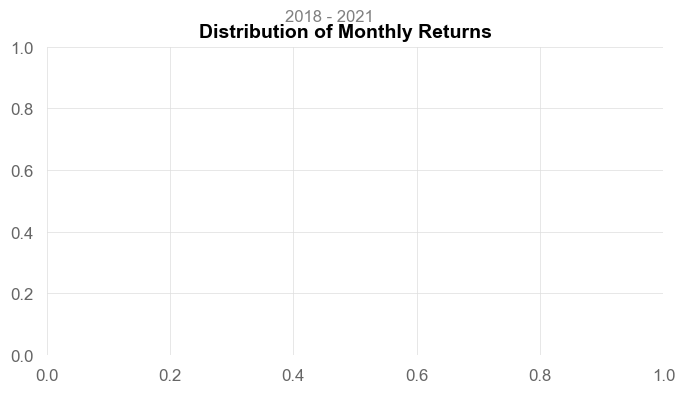

In [11]:
import quantstats as qs

final_portfolio_benchmark.index = pd.to_datetime(final_portfolio_benchmark.index)

qs.reports.full(final_portfolio_benchmark['Strategy'],benchmark = final_portfolio_benchmark['BDP_Close'],mode="full")